<a href="https://colab.research.google.com/github/renatojmf/Aspects-Extraction-in-Portuguese/blob/main/Avaliacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install sklearn-crfsuite
! pip install eli5
! pip install unidecode
! pip install stanza

In [2]:
import pandas as pd     
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk  
nltk.download('punkt')
from nltk.corpus import stopwords # Import the stop word list

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from time import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Avaliações com o dataset de restaurantes

In [26]:
data = pd.read_csv('/content/restaurantes.csv',sep=';')

In [27]:
from unidecode import unidecode
import re

words = []

for word in data['text']:
  old_string = unidecode(word)
  new_string = re.sub(r"[^a-zA-Z0-9]"," ",old_string)
  words.append(new_string.lower())

In [28]:
data['text'] = words
data['labels'] =-1
data.head()

,text,aspects,aspectsClass,labels
0,hamburgueria artesanal com tempero diferenciad...,tempero,Food,-1
1,excelente peixe para quem esta localizado no ...,peixe,Food,-1
2,serve lanches e cerveja gelada tem mesinhas f...,cerveja,Drinks,-1
3,muito bom o atendimento,atendimento,Service,-1
4,cardapio variado,Cardápio,Food,-1


In [29]:
data.loc[data["aspectsClass"] == "Service", "labels"] = 0
data.loc[data["aspectsClass"] == "Food", "labels"] = 1
data.loc[data["aspectsClass"] == "Price", "labels"] = 2
data.loc[data["aspectsClass"] == "Ambience", "labels"] = 3
data.loc[data["aspectsClass"] == "Location", "labels"] = 4

In [30]:
df = data[data['labels'] != -1]
df.head()

,text,aspects,aspectsClass,labels
0,hamburgueria artesanal com tempero diferenciad...,tempero,Food,1
1,excelente peixe para quem esta localizado no ...,peixe,Food,1
3,muito bom o atendimento,atendimento,Service,0
4,cardapio variado,Cardápio,Food,1
5,ambiente agradavel,Ambiente,Ambience,3


In [31]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["labels"], test_size = 0.3, random_state=42)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_vectorizer = CountVectorizer() # or term frequency
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [33]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, y_train)
y_pred = naive_bayes_classifier.predict(X_test_tf)

train time: 0.002s
test time:  0.000s
accuracy:   0.459
              precision    recall  f1-score   support

     Service       0.30      0.33      0.32         9
        Food       0.61      0.70      0.66        27
       Price       0.33      0.20      0.25         5
    Ambience       0.31      0.36      0.33        14
    Location       0.00      0.00      0.00         6

    accuracy                           0.46        61
   macro avg       0.31      0.32      0.31        61
weighted avg       0.41      0.46      0.43        61

confusion matrix:
[[ 3  2  0  4  0]
 [ 3 19  1  3  1]
 [ 0  2  1  2  0]
 [ 3  5  1  5  0]
 [ 1  3  0  2  0]]
------------------------------


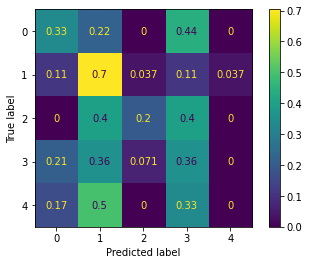

In [34]:
t = time()
naive_bayes_classifier.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
print('------------------------------')
#print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

train time: 0.005s
test time:  0.001s
accuracy:   0.590
              precision    recall  f1-score   support

     Service       0.36      0.44      0.40         9
        Food       0.65      0.74      0.69        27
       Price       1.00      0.20      0.33         5
    Ambience       0.57      0.57      0.57        14
    Location       0.75      0.50      0.60         6

    accuracy                           0.59        61
   macro avg       0.67      0.49      0.52        61
weighted avg       0.63      0.59      0.58        61

confusion matrix:
[[ 4  2  0  3  0]
 [ 4 20  0  2  1]
 [ 0  3  1  1  0]
 [ 3  3  0  8  0]
 [ 0  3  0  0  3]]
------------------------------


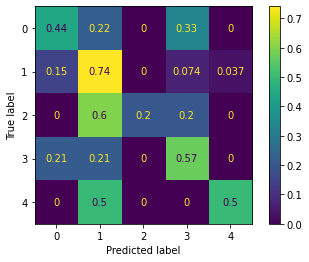

In [35]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

t = time()
dTree.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = dTree.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 0.014s
test time:  0.002s
accuracy:   0.426
              precision    recall  f1-score   support

     Service       0.33      0.22      0.27         9
        Food       0.47      0.78      0.58        27
       Price       0.00      0.00      0.00         5
    Ambience       0.33      0.21      0.26        14
    Location       0.00      0.00      0.00         6

    accuracy                           0.43        61
   macro avg       0.23      0.24      0.22        61
weighted avg       0.33      0.43      0.36        61

confusion matrix:
[[ 2  4  0  3  0]
 [ 3 21  0  2  1]
 [ 0  4  0  1  0]
 [ 1 10  0  3  0]
 [ 0  6  0  0  0]]
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


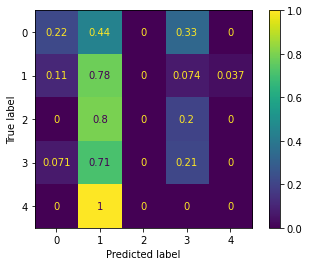

In [36]:
from sklearn.svm import SVC
svm = SVC()

t = time()
svm.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = svm.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 0.052s
test time:  0.001s
accuracy:   0.475
              precision    recall  f1-score   support

     Service       0.30      0.33      0.32         9
        Food       0.56      0.70      0.62        27
       Price       1.00      0.20      0.33         5
    Ambience       0.40      0.43      0.41        14
    Location       0.00      0.00      0.00         6

    accuracy                           0.48        61
   macro avg       0.45      0.33      0.34        61
weighted avg       0.47      0.48      0.44        61

confusion matrix:
[[ 3  2  0  4  0]
 [ 5 19  0  2  1]
 [ 0  3  1  1  0]
 [ 2  6  0  6  0]
 [ 0  4  0  2  0]]
------------------------------


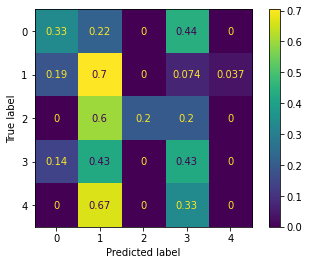

In [37]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

t = time()
regression.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = regression.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


train time: 0.845s
test time:  0.001s
accuracy:   0.508
              precision    recall  f1-score   support

     Service       0.27      0.33      0.30         9
        Food       0.64      0.78      0.70        27
       Price       1.00      0.20      0.33         5
    Ambience       0.40      0.43      0.41        14
    Location       0.00      0.00      0.00         6

    accuracy                           0.51        61
   macro avg       0.46      0.35      0.35        61
weighted avg       0.50      0.51      0.48        61

confusion matrix:
[[ 3  3  0  3  0]
 [ 3 21  0  2  1]
 [ 0  3  1  1  0]
 [ 4  4  0  6  0]
 [ 1  2  0  3  0]]
------------------------------


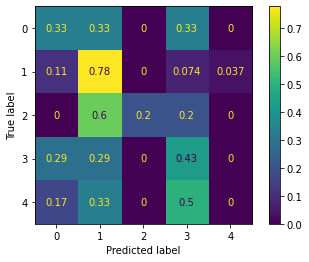

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

t = time()
mlp.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = mlp.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 3.780s
test time:  0.023s
accuracy:   0.557
              precision    recall  f1-score   support

     Service       0.40      0.44      0.42         9
        Food       0.62      0.74      0.68        27
       Price       1.00      0.20      0.33         5
    Ambience       0.53      0.64      0.58        14
    Location       0.00      0.00      0.00         6

    accuracy                           0.56        61
   macro avg       0.51      0.41      0.40        61
weighted avg       0.54      0.56      0.52        61

confusion matrix:
[[ 4  2  0  3  0]
 [ 4 20  0  2  1]
 [ 0  3  1  1  0]
 [ 2  3  0  9  0]
 [ 0  4  0  2  0]]
------------------------------


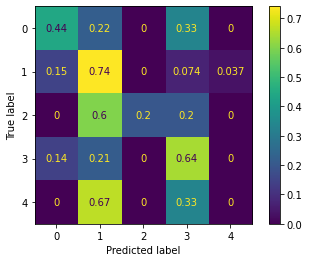

In [39]:
forest = RandomForestClassifier() 

forest = forest.fit(X_train_tf, y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = forest.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,target_names = ['Service','Food','Price','Ambience','Location']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

# Avaliações com o dataset de TVs

In [40]:
import json
tvs = json.load(open("/content/tv.json"))

In [41]:
texts = []
aspectsClass = []
for x in tvs['reviews']:
  texts.append(x['review'])
  y = x['implicit aspects']
  if(len(y) > 0):
    aspectsClass.append(y[0])
  else:
    aspectsClass.append(None)

d = {'text': texts, 'aspectsClass':aspectsClass}

df_tvs = pd.DataFrame(data=d)
df_tvs.head()

,text,aspectsClass
0,Excelente smart tv. E foi entregue vem antes d...,entrega
1,"Imagem ótima recursos de web bons , recomendo ...",produto
2,"produto ótimo, entrega antes do prazo previsto...",None
3,"Muito bom o produto, esta tv está entre as das...",funcionalidades
4,a entrega foi super rápido... muito antes do p...,None


In [42]:
values = [None, 'None']
df_tst = df_tvs[df_tvs.aspectsClass.isin(values) == False]
df_tst.head()

,text,aspectsClass
0,Excelente smart tv. E foi entregue vem antes d...,entrega
1,"Imagem ótima recursos de web bons , recomendo ...",produto
3,"Muito bom o produto, esta tv está entre as das...",funcionalidades
11,Todos os aparelhos samsung são de uma qualidad...,produto
12,"Atendeu todas as expectativas, recomendo Samsu...",produto


In [43]:
from unidecode import unidecode
import re

words = []

for word in df_tst['text']:
  old_string = unidecode(word)
  new_string = re.sub(r"[^a-zA-Z0-9]"," ",old_string)
  words.append(new_string.lower())


df_tst['text'] = words
df_tst.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,text,aspectsClass
0,excelente smart tv e foi entregue vem antes d...,entrega
1,imagem otima recursos de web bons recomendo ...,produto
3,muito bom o produto esta tv esta entre as das...,funcionalidades
11,todos os aparelhos samsung sao de uma qualidad...,produto
12,atendeu todas as expectativas recomendo samsu...,produto


In [44]:
df_tst['labels'] =-1
df_tst.loc[df_tst["aspectsClass"] == "produto", "labels"] = 0
df_tst.loc[df_tst["aspectsClass"] == "entrega", "labels"] = 1
df_tst.loc[df_tst["aspectsClass"] == "imagem", "labels"] = 2
df_tst.loc[df_tst["aspectsClass"] == "desempenho", "labels"] = 3
df_tst.loc[df_tst["aspectsClass"] == "som", "labels"] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
df = df_tst[df_tst['labels'] != -1]
df.head(10)

,text,aspectsClass,labels
0,excelente smart tv e foi entregue vem antes d...,entrega,1
1,imagem otima recursos de web bons recomendo ...,produto,0
11,todos os aparelhos samsung sao de uma qualidad...,produto,0
12,atendeu todas as expectativas recomendo samsu...,produto,0
13,rapidez boa qualidade e preocupacao em manter...,desempenho,3
14,otima imagem facil acesso a internet com wifi...,produto,0
18,produto nao deixa nada a desejar exelente go...,produto,0
28,produto excelente recomendo produto alem de ...,entrega,1
29,recomendo tem muitas funcoes praticas o wi f...,produto,0
30,maravilhosa chegou dentro do prazo estipulado ...,produto,0


In [46]:
df.labels.unique()

array([1, 0, 3, 2, 4])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["labels"], test_size = 0.3, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_vectorizer = CountVectorizer() # or term frequency
X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

train time: 0.010s
test time:  0.000s
accuracy:   0.795
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       105
           1       0.79      0.42      0.55        36
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.79       146
   macro avg       0.40      0.34      0.35       146
weighted avg       0.77      0.79      0.76       146

confusion matrix:
[[101   4   0   0]
 [ 21  15   0   0]
 [  4   0   0   0]
 [  1   0   0   0]]
------------------------------


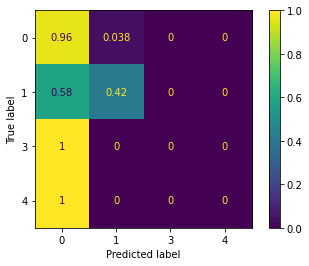

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

naive_bayes_classifier = MultinomialNB()
# naive_bayes_classifier.fit(X_train_tf, y_train)
# y_pred = naive_bayes_classifier.predict(X_test_tf)

t = time()
naive_bayes_classifier.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = naive_bayes_classifier.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)
print(metrics.classification_report(y_test, y_pred,zero_division = 0))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 0.012s
test time:  0.001s
accuracy:   0.822
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.78      0.69      0.74        36
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.82       146
   macro avg       0.41      0.40      0.40       146
weighted avg       0.81      0.82      0.81       146

confusion matrix:
[[95  7  3  0]
 [11 25  0  0]
 [ 4  0  0  0]
 [ 1  0  0  0]]
------------------------------


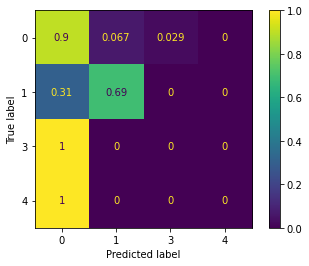

In [53]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier()

t = time()
dTree.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = dTree.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,zero_division = 0))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 0.054s
test time:  0.014s
accuracy:   0.842
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       105
           1       0.85      0.61      0.71        36
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.84       146
   macro avg       0.42      0.39      0.40       146
weighted avg       0.81      0.84      0.82       146

confusion matrix:
[[101   4   0   0]
 [ 14  22   0   0]
 [  4   0   0   0]
 [  1   0   0   0]]
------------------------------


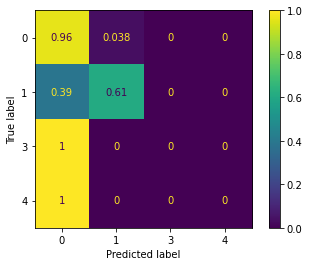

In [54]:
from sklearn.svm import SVC
svm = SVC()

t = time()
svm.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = svm.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)
print(metrics.classification_report(y_test, y_pred,zero_division = 0))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 0.110s
test time:  0.000s
accuracy:   0.829
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       105
           1       0.77      0.67      0.72        36
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.83       146
   macro avg       0.41      0.40      0.40       146
weighted avg       0.80      0.83      0.81       146

confusion matrix:
[[97  7  1  0]
 [12 24  0  0]
 [ 4  0  0  0]
 [ 1  0  0  0]]
------------------------------


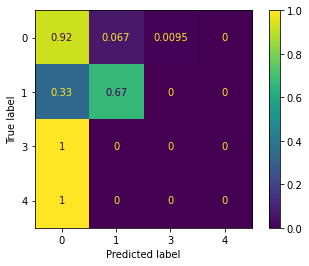

In [55]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

t = time()
regression.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = regression.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,zero_division = 0))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 3.594s
test time:  0.002s
accuracy:   0.842
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       105
           1       0.85      0.61      0.71        36
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.84       146
   macro avg       0.42      0.39      0.40       146
weighted avg       0.81      0.84      0.82       146

confusion matrix:
[[101   4   0   0]
 [ 14  22   0   0]
 [  4   0   0   0]
 [  1   0   0   0]]
------------------------------


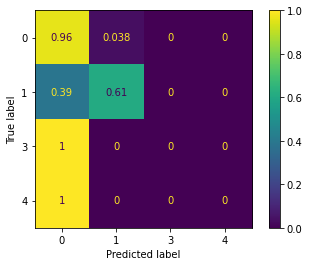

In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

t = time()
mlp.fit(X_train_tf,y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = mlp.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,zero_division = 0))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')

train time: 6.290s
test time:  0.033s
accuracy:   0.842
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       105
           1       0.95      0.53      0.68        36
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.84       146
   macro avg       0.44      0.38      0.39       146
weighted avg       0.83      0.84      0.81       146

confusion matrix:
[[104   1   0   0]
 [ 17  19   0   0]
 [  4   0   0   0]
 [  1   0   0   0]]
------------------------------


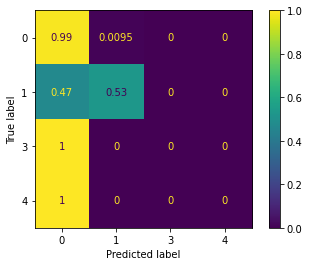

In [57]:
forest = RandomForestClassifier() 

forest = forest.fit(X_train_tf, y_train)
duration = time() - t
print("train time: %0.3fs" % duration)

t = time()
y_pred = forest.predict(X_test_tf)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,zero_division = 0))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')

print('------------------------------')